In [5]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv(r"C:\Users\FT\Downloads\dataframe_.csv")

In [7]:
data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [8]:
data.shape

(1697, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [10]:
data.isnull().sum()

input     1
output    1
dtype: int64

In [11]:
# we are having unbalanced dataset as we are having 1 Nan values in both the categories

# Build a Machine Learning Model to predict output based on the input column

In [12]:
data.duplicated(subset=data.columns).sum()

606

In [13]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1090 non-null   float64
 1   output  1090 non-null   float64
dtypes: float64(2)
memory usage: 17.2 KB


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='Density'>

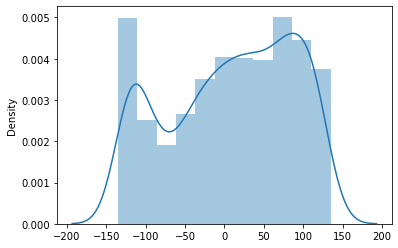

In [16]:
sns.distplot(data[['input']])

<AxesSubplot:ylabel='Density'>

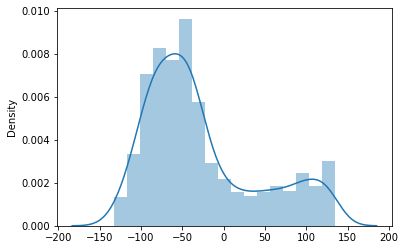

In [17]:
sns.distplot(data[["output"]])

In [18]:
# Both the colmns are following the appropriate Normal distribtion.

<AxesSubplot:xlabel='input'>

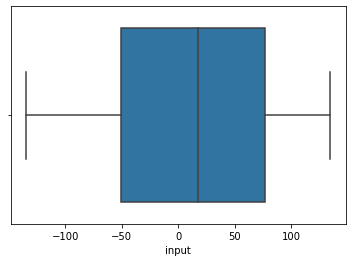

In [19]:
sns.boxplot(data['input'])

<AxesSubplot:xlabel='output'>

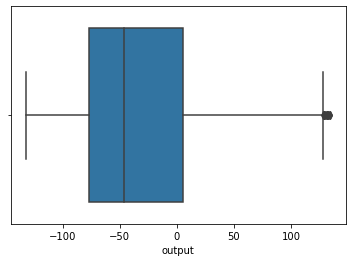

In [20]:
sns.boxplot(data["output"])

In [21]:
# using box plot we can say that, there no outliers in the dataset


In [22]:
data.dropna(inplace=True)

In [23]:
# as the data is having 2 nan values and if we remove them that will not effect the columns 

In [24]:
# Checking the info after dropping the data

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090 entries, 0 to 1089
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1090 non-null   float64
 1   output  1090 non-null   float64
dtypes: float64(2)
memory usage: 25.5 KB


In [26]:
# since the data is regression  we use regeression algorithom

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
fv=data[['input']]
cl=data[['output']]

In [29]:
x_train,x_test,y_train,y_test=train_test_split(fv,cl,train_size=0.7)

In [30]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
transfromed_train = std.fit_transform(x_train)
transfromed_test = std.transform(x_test)

In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [32]:
model=lr.fit(transfromed_train,y_train)

In [33]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [34]:
predi=model.predict(transfromed_test)

In [35]:
# performance metrics

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [39]:
mean_squared_error(y_test,predi)

3215.543481006682

In [40]:
mean_absolute_error(y_test,predi)

44.852356828524336

In [41]:
r2_score(y_test,predi)

0.23980867060668065

In [42]:
model.coef_

array([[35.4535499]])

In [43]:
model.intercept_

array([-26.94030511])

In [44]:
model.predict(fv).reshape(len(model.predict(fv)))

array([-4378.53268094, -4335.66054663, -4810.22756993, ...,
       -3924.77997589, -3980.55598275, -3939.03466415])

In [47]:
# Applying Feature Engineering -- Square

In [48]:
data['inputsquare']=data['input']**2
data

,input,output,inputsquare
0,-122.740667,-130.572085,15065.271434
1,-121.531419,-129.938929,14769.885901
2,-134.917019,-130.141832,18202.602016
3,-120.605951,-125.760932,14545.795441
4,-129.894781,-112.785214,16872.654053
...,...,...,...
1085,-112.018496,121.096397,12548.143513
1086,-119.954237,123.609122,14389.019022
1087,-109.942155,127.197394,12087.277402
1088,-111.515368,128.170885,12435.677389


In [50]:
fv=data[['input','inputsquare']]
cl=data[['output']]
x_train,x_test,y_train,y_test=train_test_split(cl,fv,train_size=0.7)

In [51]:
std = StandardScaler()
transfromed_train = std.fit_transform(x_train)
transfromed_test = std.transform(x_test)

In [53]:
model=lr.fit(transfromed_train,y_train)

In [54]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [55]:
predi=model.predict(transfromed_test)

In [56]:
mean_squared_error(y_test,predi)

9499649.887608891

In [57]:
mean_absolute_error(y_test,predi)

1829.2406642284625

In [58]:
r2_score(y_test,predi)

0.2742959126306542

In [59]:
model.coef_

array([[  41.79995683],
       [2740.78718387]])

In [60]:
model.intercept_

array([   8.27876394, 6516.51631864])

In [62]:
# Now applying cube 

In [63]:
data['inputcube']=data['input']**3
cl=data[['input','inputcube','inputsquare']]
fv=data[['output']]
x_train,x_test,y_train,y_test=train_test_split(fv,cl,train_size=0.8)
std = StandardScaler()
transfromed_train = std.fit_transform(x_train)
transfromed_test = std.transform(x_test)
model=lr.fit(transfromed_train,y_train)
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [64]:
predi=model.predict(transfromed_test)
mean_squared_error(y_test,predi)

154306501242.9286

In [65]:
mean_absolute_error(y_test,predi)

170607.13635483044

In [66]:
r2_score(y_test,predi)

0.36840296306489995

In [67]:
# By Using feature Engineering the accuracy has Increased

In [68]:
# PolynomialFeatures

In [69]:
from sklearn.preprocessing import PolynomialFeatures

In [70]:
poly_features = PolynomialFeatures(degree=7)
new= data[["input"]]
new_poly = poly_features.fit_transform(new)

In [71]:
new_poly

array([[ 1.00000000e+00, -1.22740667e+02,  1.50652714e+04, ...,
        -2.78575169e+10,  3.41925021e+12, -4.19681053e+14],
       [ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04, ...,
        -2.65120220e+10,  3.22204366e+12, -3.91579539e+14],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04, ...,
        -4.47026927e+10,  6.03115404e+12, -8.13705325e+14],
       ...,
       [ 1.00000000e+00, -1.09942155e+02,  1.20872774e+04, ...,
        -1.60627989e+10,  1.76597873e+12, -1.94155507e+14],
       [ 1.00000000e+00, -1.11515368e+02,  1.24356774e+04, ...,
        -1.72454137e+10,  1.92312866e+12, -2.14458401e+14],
       [ 1.00000000e+00, -1.10344221e+02,  1.21758472e+04, ...,
        -1.63586693e+10,  1.80508463e+12, -1.99180658e+14]])

In [72]:
scaler = StandardScaler()
new_norm = scaler.fit_transform(new_poly)

In [73]:
new_norm

array([[ 0.        , -1.66203185,  1.5981244 , ..., -2.04389419,
         1.8343436 , -2.00714939],
       [ 0.        , -1.64667302,  1.54448397, ..., -1.94354612,
         1.69094386, -1.8687898 ],
       [ 0.        , -1.81668546,  2.16784681, ..., -3.30022066,
         3.73360265, -3.94715307],
       ...,
       [ 0.        , -1.49947609,  1.05733665, ..., -1.16423485,
         0.6321589 , -0.89675996],
       [ 0.        , -1.5194577 ,  1.12060422, ..., -1.25243519,
         0.74643127, -0.99672256],
       [ 0.        , -1.50458279,  1.07342045, ..., -1.18630109,
         0.66059495, -0.92150161]])

In [76]:
y = data["output"]
x_train, x_test, y_train, y_test = train_test_split(new_norm, y, test_size=0.1)

In [77]:
model = LinearRegression().fit(x_train, y_train)

In [78]:
y_pred = model.predict(x_test)

In [79]:
model.fit(x_train, y_train)

LinearRegression()

In [80]:
y_pred = model.predict(x_test)

In [81]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [82]:
mse

1151.6259168931883

In [83]:
r2

0.6986333775665954

In [84]:
 # KNN regression

In [86]:
data=pd.read_csv(r"C:\Users\FT\Downloads\dataframe_.csv")

In [ ]:
data.drop_duplicates(inplace=True,ignore_index=True)
data.dropna(inplace=True)

In [87]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

In [88]:
fv=data[['input']]
cl=data[['output']]

In [89]:
x_train,x_test,y_train,y_test = train_test_split(fv,cl,train_size=0.8,random_state=1)
x_train_cv,x_cv,y_train_cv,y_cv=train_test_split(x_train,y_train,train_size=0.8,random_state=1)

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
std = StandardScaler()
transfromed_train = std.fit_transform(x_train_cv)
transfromed_cv = std.transform(x_cv)
transfromed_test = std.transform(x_test)

In [92]:
train_error = []
def func1(k):
    for i in range(1,k,2):
        knn = KNeighborsRegressor(n_neighbors=i)
        model = knn.fit(transfromed_train,y_train_cv)
        y_predicted = model.predict(transfromed_train)
        acu = accuracy_score(y_train_cv,y_predicted)
        train_error.append(1-acu)

In [93]:
cv_error = []
k_value = []
def func2(k):
    for i in range(1,k,2):
        knn = KNeighborsRegressor(n_neighbors=i)
        model = knn.fit(transfromed_train,y_train_cv)
        y_predicted = model.predict(transfromed_cv)
        acu = accuracy_score(y_cv,y_predicted)
        k_value.append(i)
        cv_error.append(1-acu)